In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
diabates_data = pd.read_csv("train.csv")
diabates_data.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [3]:
diabates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [4]:
diabates_data.duplicated().sum() # No Duplicates

np.int64(0)

In [5]:
diabates_data.isnull().sum() # No missing values

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [6]:
#There are some values which are not in numerical datatype we first
#convert them into numerical and then processed

In [7]:
categorical_cols = diabates_data.select_dtypes(include=['object']).columns.to_list()
categorical_cols

['gender',
 'ethnicity',
 'education_level',
 'income_level',
 'smoking_status',
 'employment_status']

In [8]:
diabates_data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [10]:
diabates_data['gender'] = diabates_data['gender'].replace(['Male','Female','Other'], [1,0,2])
diabates_data['gender'] = diabates_data['gender'].astype(int)  # or astype('int8')


C:\Users\DELL\AppData\Local\Temp\ipykernel_14288\3145766386.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabates_data['gender'] = diabates_data['gender'].replace(['Male','Female','Other'], [1,0,2])


In [11]:
# Replace 'Other' with 2
diabates_data['gender'] = diabates_data['gender'].replace('Other', 2)

# Now convert the entire column to int
diabates_data['gender'] = diabates_data['gender'].astype(int)


In [12]:
diabates_data['gender']

0         0
1         0
2         1
3         0
4         1
         ..
699995    0
699996    0
699997    0
699998    0
699999    0
Name: gender, Length: 700000, dtype: int64

In [13]:
diabates_data['ethnicity'].unique()

array(['Hispanic', 'White', 'Asian', 'Black', 'Other'], dtype=object)

In [14]:
diabates_data['education_level'].unique()

array(['Highschool', 'Graduate', 'Postgraduate', 'No formal'],
      dtype=object)

In [15]:
diabates_data['income_level'].unique()

array(['Lower-Middle', 'Upper-Middle', 'Low', 'Middle', 'High'],
      dtype=object)

In [16]:
diabates_data['smoking_status'].unique()

array(['Current', 'Never', 'Former'], dtype=object)

In [17]:
diabates_data['employment_status'].unique()

array(['Employed', 'Retired', 'Student', 'Unemployed'], dtype=object)

In [18]:
#Apply one hot encoding for the all categorical cols
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
diabates_data = pd.get_dummies(diabates_data,columns=['employment_status','smoking_status','income_level','education_level','ethnicity'],drop_first=True)

In [19]:
diabates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 37 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

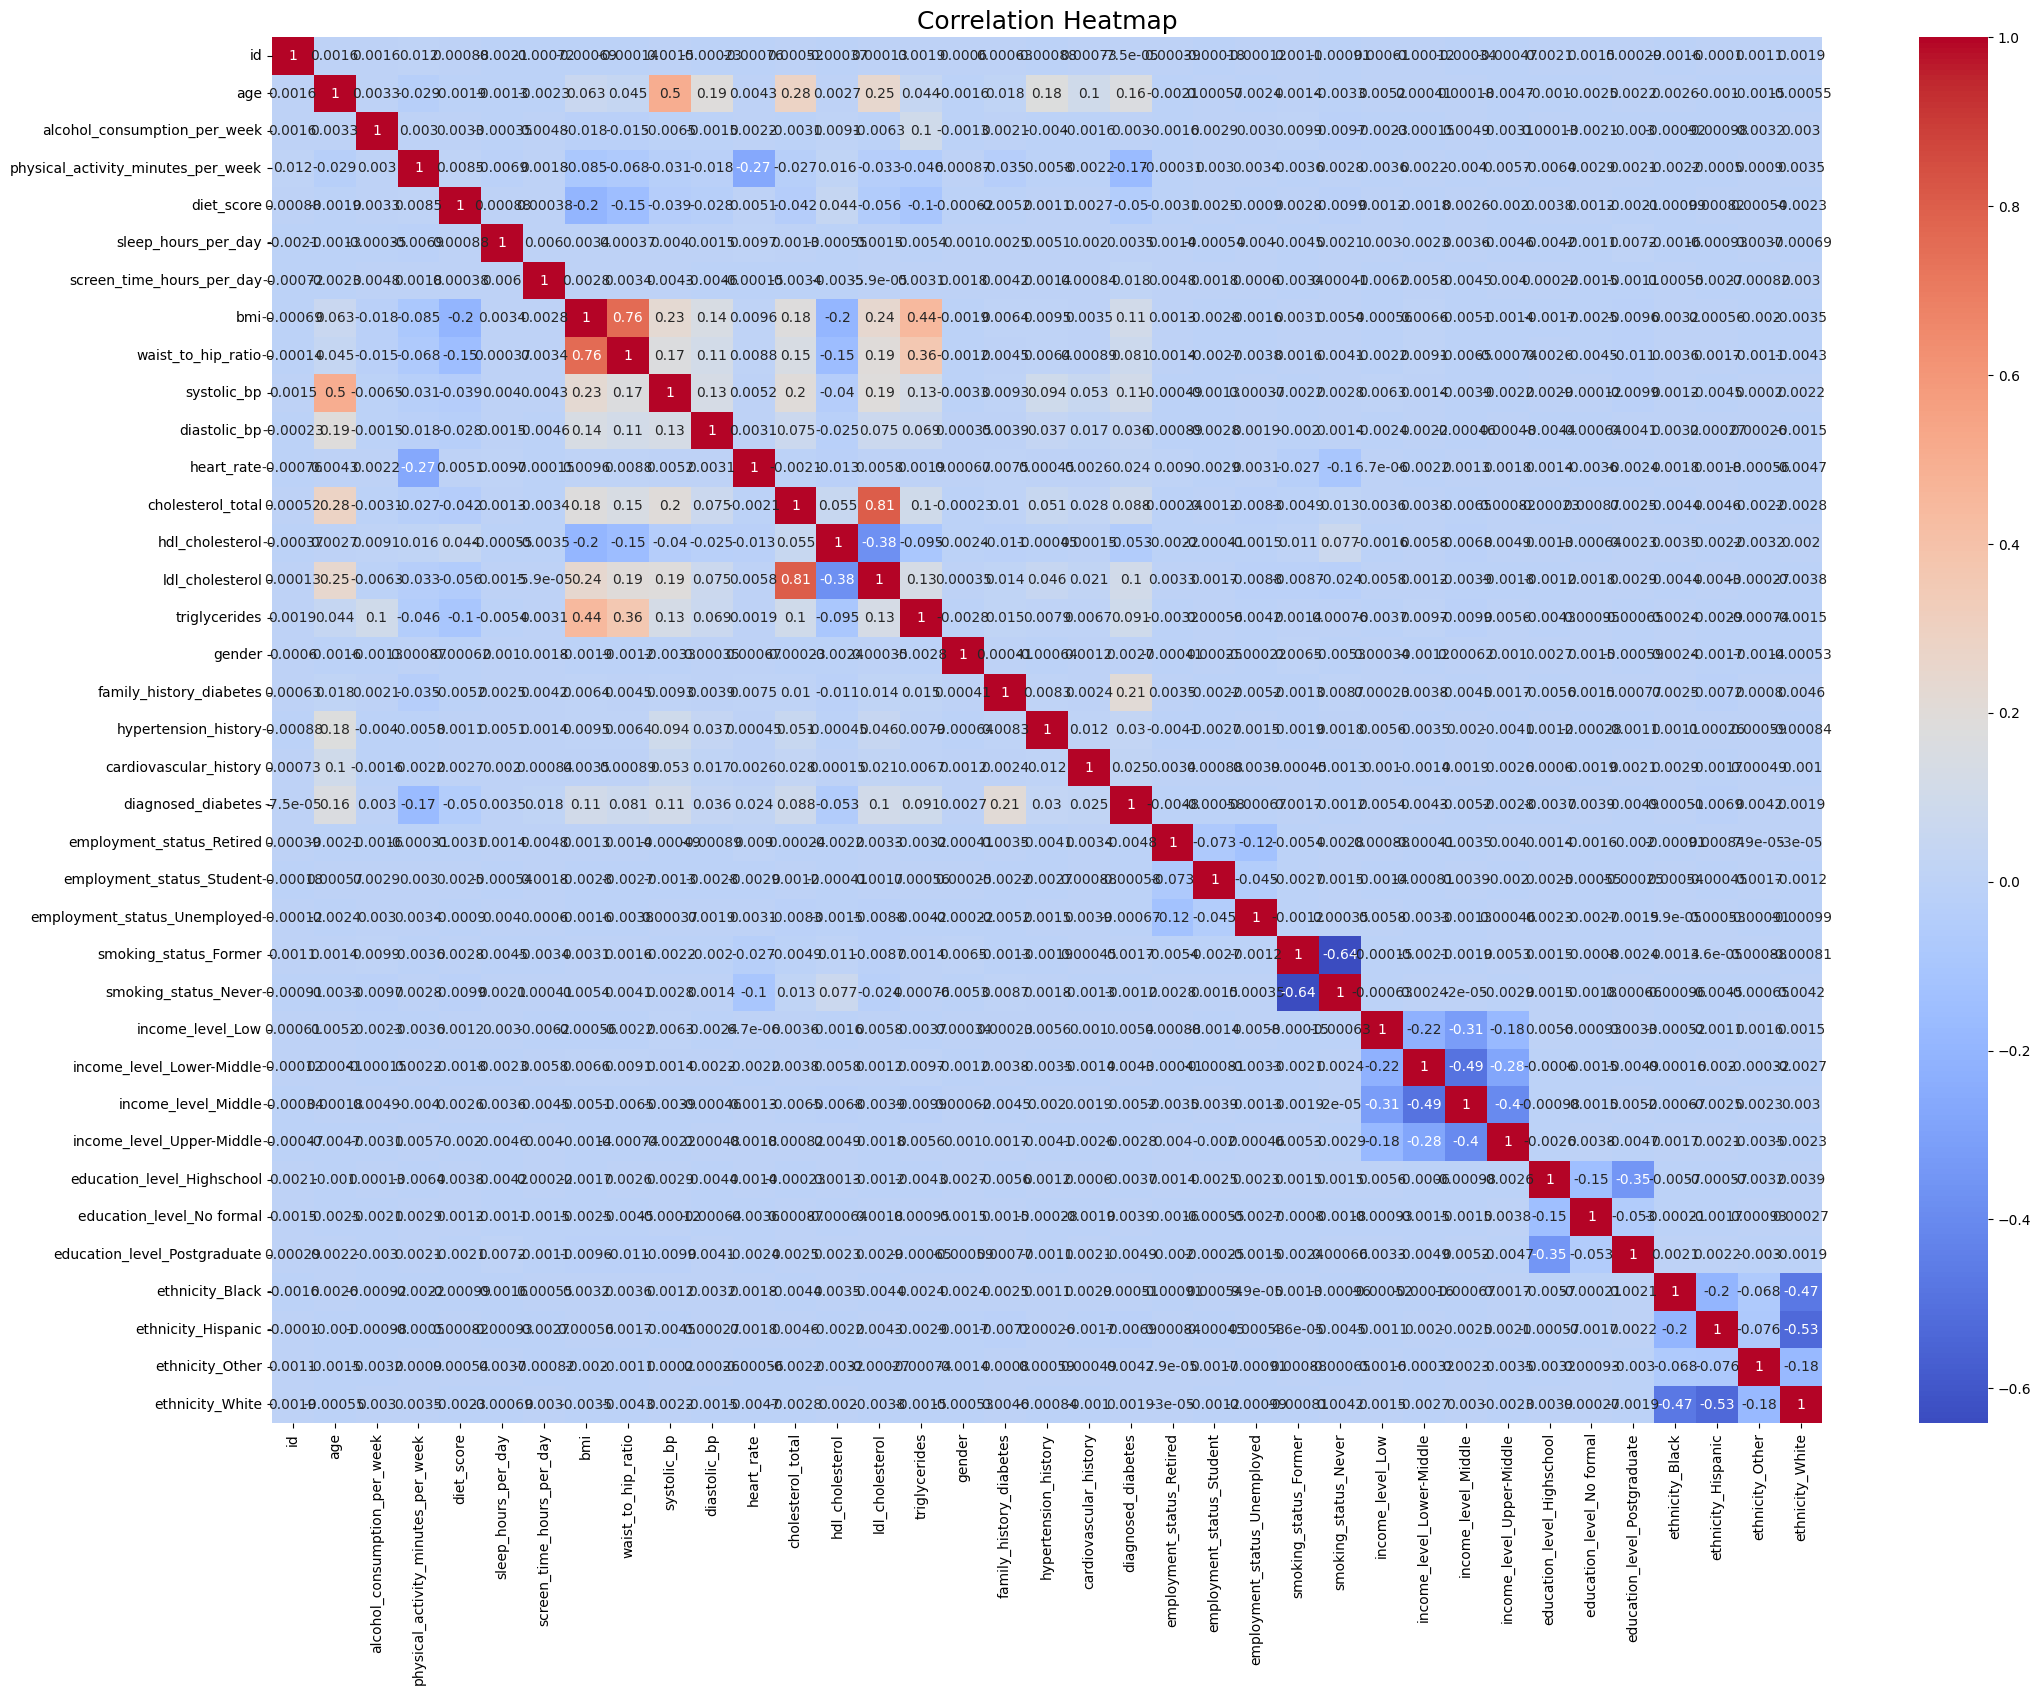

In [20]:
plt.figure(figsize=(25,18))  # increase size
sns.heatmap(diabates_data.corr(), cmap="coolwarm", annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()


In [21]:
test = pd.read_csv('test.csv')
test

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,999995,59,3,185,6.3,7.3,4.4,22.8,0.81,108,...,126,Male,White,Highschool,Upper-Middle,Former,Employed,1,0,0
299996,999996,50,2,25,5.8,7.8,4.5,29.6,0.93,112,...,112,Male,Asian,Postgraduate,Lower-Middle,Never,Employed,0,0,0
299997,999997,63,1,252,5.2,7.5,8.5,25.1,0.77,129,...,135,Female,White,Highschool,Middle,Never,Employed,0,0,0
299998,999998,48,3,72,4.9,6.9,1.8,27.7,0.89,121,...,138,Male,White,Highschool,Low,Current,Retired,0,1,0


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  300000 non-null  int64  
 1   age                                 300000 non-null  int64  
 2   alcohol_consumption_per_week        300000 non-null  int64  
 3   physical_activity_minutes_per_week  300000 non-null  int64  
 4   diet_score                          300000 non-null  float64
 5   sleep_hours_per_day                 300000 non-null  float64
 6   screen_time_hours_per_day           300000 non-null  float64
 7   bmi                                 300000 non-null  float64
 8   waist_to_hip_ratio                  300000 non-null  float64
 9   systolic_bp                         300000 non-null  int64  
 10  diastolic_bp                        300000 non-null  int64  
 11  heart_rate                

In [23]:
print(test.isnull().sum())
print(test.duplicated().sum())

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [24]:
#Apply one hot encoding for the all categorical cols
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
test = pd.get_dummies(test,columns=['employment_status','smoking_status','income_level','education_level','ethnicity'],drop_first=True)

In [25]:
test['gender'].replace(['Male','Female','Other'], [1,0,2], inplace=True)
test['gender'] = test['gender'].fillna(2).astype(int)


C:\Users\DELL\AppData\Local\Temp\ipykernel_14288\2500695863.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['gender'].replace(['Male','Female','Other'], [1,0,2], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14288\2500695863.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tes

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 36 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  300000 non-null  int64  
 1   age                                 300000 non-null  int64  
 2   alcohol_consumption_per_week        300000 non-null  int64  
 3   physical_activity_minutes_per_week  300000 non-null  int64  
 4   diet_score                          300000 non-null  float64
 5   sleep_hours_per_day                 300000 non-null  float64
 6   screen_time_hours_per_day           300000 non-null  float64
 7   bmi                                 300000 non-null  float64
 8   waist_to_hip_ratio                  300000 non-null  float64
 9   systolic_bp                         300000 non-null  int64  
 10  diastolic_bp                        300000 non-null  int64  
 11  heart_rate                

In [27]:
X = diabates_data.drop(['diagnosed_diabetes', 'id'], axis=1)
y = diabates_data['diagnosed_diabetes']

test_ids = test['id']          # keep id for submission
X_test = test.drop(['id'], axis=1)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [35]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    class_weight='balanced',   # <-- Handle imbalance
    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 348936, number of negative: 211064
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1656
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [36]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_valid)

print("Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))


Accuracy: 0.6532214285714286
              precision    recall  f1-score   support

         0.0       0.53      0.69      0.60     52629
         1.0       0.77      0.63      0.69     87371

    accuracy                           0.65    140000
   macro avg       0.65      0.66      0.65    140000
weighted avg       0.68      0.65      0.66    140000



In [37]:
test_prob = model.predict_proba(X_test)[:,1]   # probability of diabetes


In [39]:
submission = pd.DataFrame({
    "id": test_ids,
    "diagnosed_diabetes": test_prob
})

submission.to_csv("submission.csv", index=False)

print("submission.csv created successfully")


submission.csv created successfully
